In [2]:
import pandas as pd
import numpy as np

In [13]:
traffic_df = pd.read_csv('traffictotal.csv')
other_df = pd.read_csv('othertimes.csv')

In [14]:
traffic_df.loc[traffic_df['MONTH'] == 12]

,TIME,SEGMENT_ID,SPEED,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,STREET_HEADING,COMMENTS,...,HOUR,DAY_OF_WEEK,MONTH,RECORD_ID,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE,START_LOCATION,END_LOCATION
178548,12/19/2022 04:51:42 PM,1299,20,LaSalle,SB,Wacker,Jackson,0.60,N,NaN,...,16,2,12,1299-202212192251,41.886928,-87.632584,41.878134,-87.632357,POINT (-87.632584 41.886928),POINT (-87.632357 41.878134)
178549,12/19/2022 04:51:41 PM,1294,18,State,NB,Congress,Wacker,0.77,N,NaN,...,16,2,12,1294-202212192251,41.875639,-87.627518,41.886813,-87.627876,POINT (-87.627518 41.875639),POINT (-87.627876 41.886813)
178550,12/19/2022 04:51:43 PM,1304,23,Harrison,EB,Halsted,Canal,0.40,W,NaN,...,16,2,12,1304-202212192251,41.874238,-87.647125,41.874238,-87.639487,POINT (-87.647125 41.874238),POINT (-87.639487 41.874238)
178551,12/19/2022 04:51:43 PM,1309,19,Harrison,WB,Canal,Halsted,0.40,W,NaN,...,16,2,12,1309-202212192251,41.874538,-87.639487,41.874438,-87.647125,POINT (-87.639487 41.874538),POINT (-87.647125 41.874438)
178552,12/19/2022 04:51:43 PM,1303,19,Balbo,WB,LakeShore Dr,Michigan,0.52,E,NaN,...,16,2,12,1303-202212192251,41.873356,-87.617312,41.873192,-87.627565,POINT (-87.617312 41.873356),POINT (-87.627565 41.873192)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186339,12/19/2022 05:50:58 PM,474,29,95th,WB,Torrence,Jeffery,0.80,E,NaN,...,17,2,12,0474-202212192350,41.722841,-87.559871,41.722642,-87.575365,POINT (-87.5598708419 41.7228414789),POINT (-87.5753648927 41.7226422935)
186340,12/19/2022 05:50:41 PM,242,24,Roosevelt,WB,Jefferson,Halsted,0.25,W,NaN,...,17,2,12,0242-202212192350,41.867357,-87.642186,41.867291,-87.646917,POINT (-87.6421863761 41.8673568658),POINT (-87.6469168821 41.867291304)
186341,12/19/2022 05:51:28 PM,1053,20,Washington,EB,Halsted,Wacker,0.53,W,NaN,...,17,2,12,1053-202212192351,41.883032,-87.647405,41.883144,-87.637026,POINT (-87.647404773 41.883031561),POINT (-87.6370264614 41.883144306)
186342,12/19/2022 05:51:06 PM,1273,18,Madison,WB,Racine,Ashland,0.50,W,NaN,...,17,2,12,1273-202212192351,41.881715,-87.657142,41.881554,-87.666802,POINT (-87.657142 41.881715),POINT (-87.666802 41.881554)


In [15]:
traffic = traffic_df.groupby(['SEGMENT_ID']).mean().sort_values('SEGMENT_ID', ascending = True)

In [16]:
max_speed = other_df.groupby(['SEGMENT_ID']).max().sort_values('SEGMENT_ID', ascending = True)

In [17]:
max_speed = max_speed.reset_index()
traffic = traffic.reset_index()

In [18]:
max_speed_2 = max_speed[max_speed['SEGMENT_ID'].isin(traffic['SEGMENT_ID'])]
#min_speed_2 = min_speed[min_speed['SEGMENT_ID'].isin(evening['SEGMENT_ID'])]

In [19]:
traffic = traffic.reset_index()
max_speed_2 = max_speed_2.reset_index()

In [20]:
traffic

,index,SEGMENT_ID,SPEED,LENGTH,BUS_COUNT,MESSAGE_COUNT,HOUR,DAY_OF_WEEK,MONTH,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE
0,0,1,24.287879,0.5,1.090909,9.772727,11.242424,4.340909,6.166667,41.793067,-87.723160,41.793141,-87.713607
1,1,2,20.193717,0.5,1.366492,13.298429,12.083770,4.146597,6.340314,41.793141,-87.713607,41.793377,-87.703555
2,2,3,23.198925,0.5,1.376344,12.188172,12.005376,4.086022,6.333333,41.793377,-87.703555,41.793554,-87.693799
3,3,4,21.779006,0.5,1.342541,14.762431,11.917127,4.121547,6.458564,41.793554,-87.693799,41.793739,-87.684043
4,4,5,28.279330,0.5,1.335196,9.547486,11.804469,4.273743,6.351955,41.793739,-87.684043,41.793779,-87.674302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,1028,1305,18.685484,0.6,2.040323,8.266129,13.725806,3.887097,6.314516,41.874652,-87.627611,41.874538,-87.639487
1029,1029,1306,22.306122,0.5,1.081633,6.102041,12.795918,3.897959,6.163265,41.867374,-87.630336,41.874521,-87.630574
1030,1030,1307,20.335025,0.5,1.563452,7.913706,12.284264,4.167513,6.172589,41.874521,-87.630774,41.867374,-87.630536
1031,1031,1308,20.096296,0.6,1.755556,4.088889,13.274074,4.140741,5.866667,41.874238,-87.639487,41.874452,-87.627611


In [21]:
max_speed_2

,index,SEGMENT_ID,TIME,SPEED,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,STREET_HEADING,...,HOUR,DAY_OF_WEEK,MONTH,RECORD_ID,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE,START_LOCATION,END_LOCATION
0,0,1,12/19/2022 11:30:50 PM,35,55th,EB,Pulaski,Central Park,0.5,W,...,23,7,12,0001-202212200530,41.793067,-87.723160,41.793141,-87.713607,POINT (-87.7231602513 41.7930671862),POINT (-87.7136071496 41.793140551)
1,1,2,12/19/2022 11:30:50 PM,32,55th,EB,Central Park,Kedzie,0.5,W,...,23,7,12,0002-202212200530,41.793141,-87.713607,41.793377,-87.703555,POINT (-87.7136071496 41.793140551),POINT (-87.7035554211 41.7933767009)
2,2,3,12/19/2022 11:40:05 PM,34,55th,EB,Kedzie,California,0.5,W,...,23,7,12,0003-202212200540,41.793377,-87.703555,41.793554,-87.693799,POINT (-87.7035554211 41.7933767009),POINT (-87.693799302 41.7935536023)
3,3,4,12/19/2022 11:40:05 PM,36,55th,EB,California,Western,0.5,W,...,23,7,12,0004-202212200540,41.793554,-87.693799,41.793739,-87.684043,POINT (-87.693799302 41.7935536023),POINT (-87.6840431555 41.7937393759)
4,4,5,12/19/2022 11:40:06 PM,40,Garfield,EB,Western,Damen,0.5,W,...,23,7,12,0005-202212200540,41.793739,-87.684043,41.793779,-87.674302,POINT (-87.6840431555 41.7937393759),POINT (-87.6743019717 41.7937791103)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,1037,1305,12/19/2022 11:31:39 PM,30,Harrison,WB,State,Canal,0.6,W,...,23,7,12,1305-202212200531,41.874652,-87.627611,41.874538,-87.639487,POINT (-87.627611 41.874652),POINT (-87.639487 41.874538)
1029,1038,1306,12/19/2022 08:10:59 PM,34,Clark,NB,Roosevelt,Harrison,0.5,S,...,20,7,12,1306-202212200210,41.867374,-87.630336,41.874521,-87.630574,POINT (-87.630336 41.867374),POINT (-87.630574 41.874521)
1030,1039,1307,12/19/2022 11:50:36 PM,34,Clark,SB,Harrison,Roosevelt,0.5,S,...,23,7,12,1307-202212200550,41.874521,-87.630774,41.867374,-87.630536,POINT (-87.630774 41.874521),POINT (-87.630536 41.867374)
1031,1040,1308,12/19/2022 11:01:40 PM,29,Harrison,EB,Canal,State,0.6,W,...,23,7,12,1308-202212200501,41.874238,-87.639487,41.874452,-87.627611,POINT (-87.639487 41.874238),POINT (-87.627611 41.874452)


In [22]:
minmaxnorm = pd.DataFrame(columns = ['SEGMENT_ID', 'Scaled'])
for x in range(len(traffic)):
    scaled = (traffic.loc[x]['SPEED'] - 0)/(max_speed_2.loc[x]['SPEED'])
    minmaxnorm = minmaxnorm.append({'SEGMENT_ID' : traffic.loc[x]['SEGMENT_ID'], 'Scaled' : scaled}, ignore_index = True)
    print(x, scaled)

/var/folders/ql/s09tgv512g79z_3r56wyw3c80000gn/T/ipykernel_87312/3920600309.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  minmaxnorm = minmaxnorm.append({'SEGMENT_ID' : traffic.loc[x]['SEGMENT_ID'], 'Scaled' : scaled}, ignore_index = True)
/var/folders/ql/s09tgv512g79z_3r56wyw3c80000gn/T/ipykernel_87312/3920600309.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  minmaxnorm = minmaxnorm.append({'SEGMENT_ID' : traffic.loc[x]['SEGMENT_ID'], 'Scaled' : scaled}, ignore_index = True)
/var/folders/ql/s09tgv512g79z_3r56wyw3c80000gn/T/ipykernel_87312/3920600309.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  minmaxnorm = minmaxnorm.append({'SEGMENT_ID' : traffic.loc[x]['SEGMENT_ID'], 'Scaled' : scaled}, ignore_index = T

0 0.693939393939394
1 0.631053664921466
2 0.6823213156230234
3 0.6049723756906078
4 0.7069832402234637
5 0.6797556719022687
6 0.6424758091424758
7 0.6714975845410628
8 0.6280585106382979
9 0.6954191033138402
10 0.6507309941520467
11 0.7041226747109101
12 0.7576467346376412
13 0.6814948920212078
14 0.7497762663325578
15 0.7497762663325578
16 0.7411184210526316
17 0.7276190476190476
18 0.6624423963133641
19 0.6996336996336996
20 0.6985134940106797
21 0.7056154282473057
22 0.7485970819304153
23 0.644513826940232
24 0.6317357512953368
25 0.6620365306792082
26 0.6848351648351648
27 0.682076813655761
28 0.6906116642958748
29 0.6646127993278252
30 0.6229123533471359
31 0.6144304682040531
32 0.6643790849673202
33 0.6500711237553343
34 0.7087797619047619
35 0.62522903453136
36 0.6432592175626232
37 0.6653820598006644
38 0.6705882352941177
39 0.633384536610343
40 0.5978579812206573
41 0.6598302687411598
42 0.5869306502217894
43 0.6121447028423773
44 0.6182474874371859
45 0.6347801256424901
46 0.

/var/folders/ql/s09tgv512g79z_3r56wyw3c80000gn/T/ipykernel_87312/3920600309.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  minmaxnorm = minmaxnorm.append({'SEGMENT_ID' : traffic.loc[x]['SEGMENT_ID'], 'Scaled' : scaled}, ignore_index = True)
/var/folders/ql/s09tgv512g79z_3r56wyw3c80000gn/T/ipykernel_87312/3920600309.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  minmaxnorm = minmaxnorm.append({'SEGMENT_ID' : traffic.loc[x]['SEGMENT_ID'], 'Scaled' : scaled}, ignore_index = True)
/var/folders/ql/s09tgv512g79z_3r56wyw3c80000gn/T/ipykernel_87312/3920600309.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  minmaxnorm = minmaxnorm.append({'SEGMENT_ID' : traffic.loc[x]['SEGMENT_ID'], 'Scaled' : scaled}, ignore_index = T

In [23]:
minmaxnorm.sort_values('Scaled', ascending = True).head(5)

,SEGMENT_ID,Scaled
862,1034.0,0.501240
789,907.0,0.503151
1023,1300.0,0.509485
752,860.0,0.510299
492,518.0,0.519819


In [24]:
traffic_df.loc[traffic_df['SEGMENT_ID'] == 1034].sort_values('SPEED', ascending = False)

,TIME,SEGMENT_ID,SPEED,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,STREET_HEADING,COMMENTS,...,HOUR,DAY_OF_WEEK,MONTH,RECORD_ID,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE,START_LOCATION,END_LOCATION
145269,07/15/2022 04:51:28 PM,1034,32,Wacker,SB,Lake,Madison,0.26,N,NaN,...,16,6,7,1034-202207152151,41.885726,-87.637155,41.881916,-87.637074,POINT (-87.637155382 41.8857258051),POINT (-87.6370736078 41.8819163019)
127815,08/15/2022 04:40:55 PM,1034,31,Wacker,SB,Lake,Madison,0.26,N,NaN,...,16,2,8,1034-202208152140,41.885726,-87.637155,41.881916,-87.637074,POINT (-87.637155382 41.8857258051),POINT (-87.6370736078 41.8819163019)
80966,02/15/2022 04:32:43 PM,1034,29,Wacker,SB,Lake,Madison,0.26,N,NaN,...,16,3,2,1034-202202152232,41.885726,-87.637155,41.881916,-87.637074,POINT (-87.637155382 41.8857258051),POINT (-87.6370736078 41.8819163019)
46301,06/15/2022 05:01:54 PM,1034,29,Wacker,SB,Lake,Madison,0.26,N,NaN,...,17,4,6,1034-202206152201,41.885726,-87.637155,41.881916,-87.637074,POINT (-87.637155382 41.8857258051),POINT (-87.6370736078 41.8819163019)
148337,07/15/2022 05:31:52 PM,1034,29,Wacker,SB,Lake,Madison,0.26,N,NaN,...,17,6,7,1034-202207152231,41.885726,-87.637155,41.881916,-87.637074,POINT (-87.637155382 41.8857258051),POINT (-87.6370736078 41.8819163019)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146040,07/15/2022 05:02:13 PM,1034,3,Wacker,SB,Lake,Madison,0.26,N,NaN,...,17,6,7,1034-202207152202,41.885726,-87.637155,41.881916,-87.637074,POINT (-87.637155382 41.8857258051),POINT (-87.6370736078 41.8819163019)
48613,06/15/2022 05:31:35 PM,1034,3,Wacker,SB,Lake,Madison,0.26,N,NaN,...,17,4,6,1034-202206152231,41.885726,-87.637155,41.881916,-87.637074,POINT (-87.637155382 41.8857258051),POINT (-87.6370736078 41.8819163019)
32741,09/15/2022 05:51:32 PM,1034,2,Wacker,SB,Lake,Madison,0.26,N,NaN,...,17,5,9,1034-202209152251,41.885726,-87.637155,41.881916,-87.637074,POINT (-87.637155382 41.8857258051),POINT (-87.6370736078 41.8819163019)
147568,07/15/2022 05:21:42 PM,1034,2,Wacker,SB,Lake,Madison,0.26,N,NaN,...,17,6,7,1034-202207152221,41.885726,-87.637155,41.881916,-87.637074,POINT (-87.637155382 41.8857258051),POINT (-87.6370736078 41.8819163019)


In [25]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Streets')

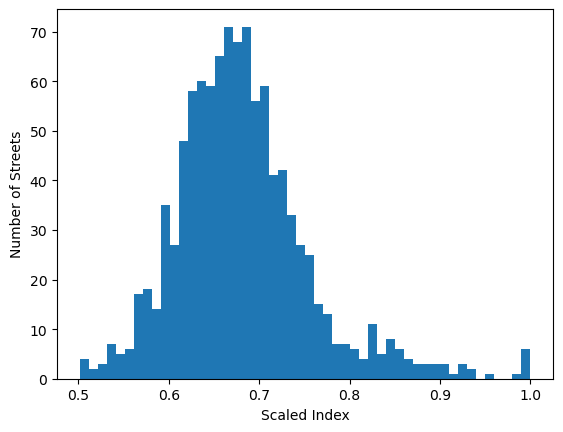

In [27]:
plt.hist(minmaxnorm['Scaled'], bins = 50)
plt.xlabel('Scaled Index')
plt.ylabel('Number of Streets')

In [ ]:
data_1034 = pd.read_csv('july1034.csv')

In [ ]:
plt.scatter(data_1034['TIME'], data_1034['SPEED'])

In [ ]:
plt.plot(data_1034['TIME'], data_1034['SPEED'])

In [ ]:
traffic

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
plt.scatter(traffic['LENGTH'], traffic['SPEED'])

In [ ]:
x, y = traffic['LENGTH'], traffic['SPEED']

In [ ]:
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x, y)

In [ ]:
model.score(x,y)

In [3]:
df_new = pd.read_csv('907.csv')

In [6]:
df_new

,TIME,SEGMENT_ID,SPEED,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,STREET_HEADING,COMMENTS,...,HOUR,DAY_OF_WEEK,MONTH,RECORD_ID,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE,START_LOCATION,END_LOCATION
0,02/23/2022 12:41:01 PM,907,16,Michigan,NB,Congress,Randolph,0.6,S,NaN,...,12,4,2,0907-202202231841,41.875777,-87.624123,41.884474,-87.624264,POINT (-87.624123 41.875777),POINT (-87.62426376 41.88447407)
1,04/18/2022 11:31:26 AM,907,20,Michigan,NB,Congress,Randolph,0.6,S,NaN,...,11,2,4,0907-202204181631,41.875777,-87.624123,41.884474,-87.624264,POINT (-87.624123 41.875777),POINT (-87.62426376 41.88447407)
2,02/23/2022 12:51:12 PM,907,18,Michigan,NB,Congress,Randolph,0.6,S,NaN,...,12,4,2,0907-202202231851,41.875777,-87.624123,41.884474,-87.624264,POINT (-87.624123 41.875777),POINT (-87.62426376 41.88447407)
3,06/11/2022 02:40:05 AM,907,27,Michigan,NB,Congress,Randolph,0.6,S,NaN,...,2,7,6,0907-202206110740,41.875777,-87.624123,41.884474,-87.624264,POINT (-87.624123 41.875777),POINT (-87.62426376 41.88447407)
4,02/23/2022 01:02:12 PM,907,18,Michigan,NB,Congress,Randolph,0.6,S,NaN,...,13,4,2,0907-202202231902,41.875777,-87.624123,41.884474,-87.624264,POINT (-87.624123 41.875777),POINT (-87.62426376 41.88447407)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40290,12/31/2022 11:10:33 PM,907,12,Michigan,NB,Congress,Randolph,0.6,S,NaN,...,23,7,12,0907-202301010510,41.875777,-87.624123,41.884474,-87.624264,POINT (-87.624123 41.875777),POINT (-87.62426376 41.88447407)
40291,12/31/2022 11:20:47 PM,907,18,Michigan,NB,Congress,Randolph,0.6,S,NaN,...,23,7,12,0907-202301010520,41.875777,-87.624123,41.884474,-87.624264,POINT (-87.624123 41.875777),POINT (-87.62426376 41.88447407)
40292,12/31/2022 11:31:08 PM,907,12,Michigan,NB,Congress,Randolph,0.6,S,NaN,...,23,7,12,0907-202301010531,41.875777,-87.624123,41.884474,-87.624264,POINT (-87.624123 41.875777),POINT (-87.62426376 41.88447407)
40293,12/31/2022 11:40:23 PM,907,23,Michigan,NB,Congress,Randolph,0.6,S,NaN,...,23,7,12,0907-202301010540,41.875777,-87.624123,41.884474,-87.624264,POINT (-87.624123 41.875777),POINT (-87.62426376 41.88447407)


In [4]:
df_new['TIME']

0        02/23/2022 12:41:01 PM
1        04/18/2022 11:31:26 AM
2        02/23/2022 12:51:12 PM
3        06/11/2022 02:40:05 AM
4        02/23/2022 01:02:12 PM
                  ...          
40290    12/31/2022 11:10:33 PM
40291    12/31/2022 11:20:47 PM
40292    12/31/2022 11:31:08 PM
40293    12/31/2022 11:40:23 PM
40294    12/31/2022 11:50:26 PM
Name: TIME, Length: 40295, dtype: object

In [5]:
df_new.describe()

,SEGMENT_ID,SPEED,LENGTH,COMMENTS,BUS_COUNT,MESSAGE_COUNT,HOUR,DAY_OF_WEEK,MONTH,START_LATITUDE,START_LONGITUDE,END_LATITUDE,END_LONGITUDE
count,40295.0,40295.000000,4.029500e+04,0.0,40295.000000,40295.000000,40295.000000,40295.000000,40295.000000,4.029500e+04,4.029500e+04,4.029500e+04,4.029500e+04
mean,907.0,20.433801,6.000000e-01,NaN,6.722025,45.178161,12.279787,4.032064,6.035488,4.187578e+01,-8.762412e+01,4.188447e+01,-8.762426e+01
std,0.0,4.452551,2.949899e-13,NaN,4.334987,32.644203,6.609197,1.983043,3.195043,2.700806e-11,4.662639e-11,2.727097e-11,5.586356e-11
min,907.0,0.000000,6.000000e-01,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,4.187578e+01,-8.762412e+01,4.188447e+01,-8.762426e+01
25%,907.0,18.000000,6.000000e-01,NaN,3.000000,19.000000,7.000000,2.000000,3.000000,4.187578e+01,-8.762412e+01,4.188447e+01,-8.762426e+01
50%,907.0,20.000000,6.000000e-01,NaN,6.000000,39.000000,12.000000,4.000000,6.000000,4.187578e+01,-8.762412e+01,4.188447e+01,-8.762426e+01
75%,907.0,23.000000,6.000000e-01,NaN,10.000000,65.000000,18.000000,6.000000,9.000000,4.187578e+01,-8.762412e+01,4.188447e+01,-8.762426e+01
max,907.0,37.000000,6.000000e-01,NaN,25.000000,275.000000,23.000000,7.000000,12.000000,4.187578e+01,-8.762412e+01,4.188447e+01,-8.762426e+01
